# Dataset

Data Set Information:

The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks are presented in the original paper. The last 500,000 examples are used as a test set.


Attribute Information:

The first column is the class label (1 for signal, 0 for background), followed by the 28 features (21 low-level features then 7 high-level features): lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb. For more detailed information about each feature see the original paper.



In [12]:

# required libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
Higgs = pd.read_csv("C:/Users/taniat470s/Desktop/SMU_course/DS7333/CaseStudy12/HIGGS.csv", header=None)

In [3]:
Higgs.columns =['label','lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi', 'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b-tag', 'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b-tag', 'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b-tag', 'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'] 

In [4]:
Higgs

,label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,...,jet_4_eta,jet_4_phi,jet_4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999995,1.0,1.159912,1.013847,0.108615,1.495524,-0.537545,2.342396,-0.839740,1.320683,0.000000,...,-0.097068,1.190680,3.101961,0.822136,0.766772,1.002191,1.061233,0.837004,0.860472,0.772484
10999996,1.0,0.618388,-1.012982,1.110139,0.941023,-0.379199,1.004656,0.348535,-1.678593,2.173076,...,-0.216995,1.049177,3.101961,0.826829,0.989809,1.029104,1.199679,0.891481,0.938490,0.865269
10999997,1.0,0.700559,0.774251,1.520182,0.847112,0.211230,1.095531,0.052457,0.024553,2.173076,...,1.585235,1.713962,0.000000,0.337374,0.845208,0.987610,0.883422,1.888438,1.153766,0.931279
10999998,0.0,1.178030,0.117796,-1.276980,1.864457,-0.584370,0.998519,-1.264549,1.276333,0.000000,...,1.399515,-1.313189,0.000000,0.838842,0.882890,1.201380,0.939216,0.339705,0.759070,0.719119


In [192]:
Higgs.shape

(11000000, 29)

In [14]:
Higgs_1000 = Higgs.sample(1000)

In [15]:
Higgs_1000

,label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,...,jet_4_eta,jet_4_phi,jet_4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
6990454,1.0,0.855934,-0.029273,-0.467434,0.596790,1.261973,1.518115,0.302985,1.116118,0.000000,...,-0.603425,-0.656728,0.000000,1.628403,1.312801,0.990108,0.988375,1.312598,1.344399,1.049008
10026376,0.0,0.754546,0.296032,-1.534435,0.649273,-0.191438,1.266378,-1.422986,-0.952916,0.000000,...,-0.758330,0.631328,3.101961,6.866672,3.678253,0.990255,0.970783,0.483740,2.231388,1.683568
3730764,0.0,1.773907,1.365450,1.648909,1.151685,-0.581096,1.238988,1.037736,1.017440,1.086538,...,1.009754,0.268416,0.000000,1.008232,1.662468,1.793291,1.305979,2.086671,1.733232,1.482058
1630709,0.0,1.481276,-0.015638,-0.079031,1.271116,-0.532378,1.392888,-0.898164,1.524139,0.000000,...,0.002038,0.373849,3.101961,0.970809,1.000433,0.991906,0.821092,0.765341,1.238410,1.255652
2680310,1.0,0.682807,0.776199,0.272853,1.262301,-1.520787,1.258134,1.440759,-1.738466,2.173076,...,-2.164135,-1.019085,0.000000,0.456616,1.231410,1.284884,0.645382,0.841168,0.788731,0.783623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229955,1.0,0.801214,1.745298,-1.123838,0.494068,0.702000,2.289356,-0.209954,0.139863,0.000000,...,-1.415427,-1.355917,0.000000,0.883420,0.634182,0.990466,1.209499,0.533962,0.817106,0.756668
3713586,0.0,1.096225,-1.946044,-1.659834,0.958096,0.338453,1.305220,-1.107103,1.317911,0.000000,...,-0.450185,-0.004703,3.101961,1.508500,1.422875,1.382208,1.111340,1.122637,1.122588,1.044413
8645351,1.0,0.867280,0.535629,0.041476,1.258501,1.045904,1.162954,-0.885291,-1.180210,2.173076,...,0.299356,-1.268241,0.000000,0.932359,1.112243,1.138712,0.912279,0.662467,1.057161,0.892303
5921873,1.0,0.830129,1.000212,-1.103863,1.680590,1.367263,0.629433,-0.647636,0.023445,0.000000,...,-1.985911,1.207882,0.000000,1.456057,1.155768,1.296454,1.252634,0.952436,0.970628,0.990692


In [16]:
Higgs_1000.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 6990454 to 6316039
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   label                     1000 non-null   float64
 1   lepton_pT                 1000 non-null   float64
 2   lepton_eta                1000 non-null   float64
 3   lepton_phi                1000 non-null   float64
 4   missing_energy_magnitude  1000 non-null   float64
 5   missing_energy_phi        1000 non-null   float64
 6   jet_1_pt                  1000 non-null   float64
 7   jet_1_eta                 1000 non-null   float64
 8   jet_1_phi                 1000 non-null   float64
 9   jet_1_b-tag               1000 non-null   float64
 10  jet_2_pt                  1000 non-null   float64
 11  jet_2_eta                 1000 non-null   float64
 12  jet_2_phi                 1000 non-null   float64
 13  jet_2_b-tag               1000 non-null   float64
 14 

# EDA

In [18]:
df = pd.DataFrame(Higgs_1000.label.value_counts())
df

,label
1.0,515
0.0,485


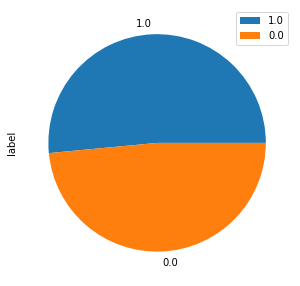

In [20]:
plot = df.plot.pie(y='label', figsize=(5, 5))

In [21]:
outputDir = 'C:/Users/taniat470s/Desktop/SMU_course/DS7333/CaseStudy12/'

In [22]:
Higgs_1000.to_csv(outputDir + 'Higgs_1000.csv', sep=',', index=False)

In [25]:
Higgs_1000.columns

Index(['label', 'lepton_pT', 'lepton_eta', 'lepton_phi',
       'missing_energy_magnitude', 'missing_energy_phi', 'jet_1_pt',
       'jet_1_eta', 'jet_1_phi', 'jet_1_b-tag', 'jet_2_pt', 'jet_2_eta',
       'jet_2_phi', 'jet_2_b-tag', 'jet_3_pt', 'jet_3_eta', 'jet_3_phi',
       'jet_3_b-tag', 'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b-tag',
       'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')

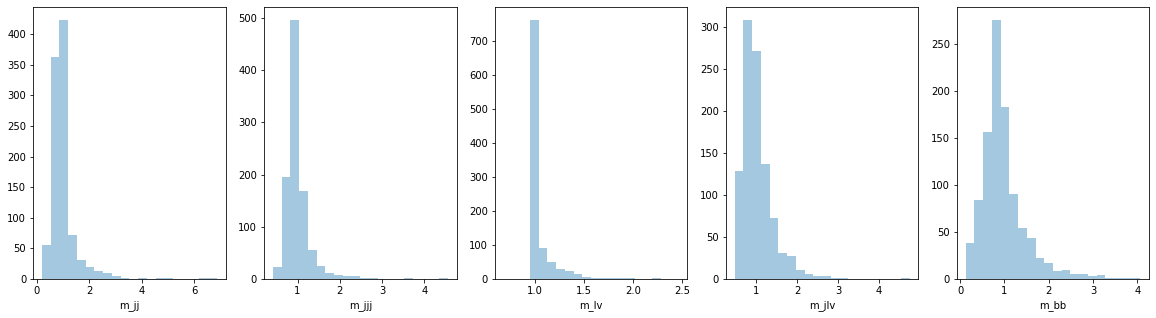

In [27]:
f, ax = plt.subplots(1,5,figsize=(20, 5))
sns.distplot(Higgs_1000["m_jj"], bins=20, kde=False, ax=ax[0])
sns.distplot(Higgs_1000["m_jjj"], bins=20, kde=False, ax=ax[1])
sns.distplot(Higgs_1000["m_lv"], bins=20, kde=False, ax=ax[2])
sns.distplot(Higgs_1000["m_jlv"], bins=20, kde=False, ax=ax[3])
sns.distplot(Higgs_1000["m_bb"], bins=20, kde=False, ax=ax[4])
plt.show()

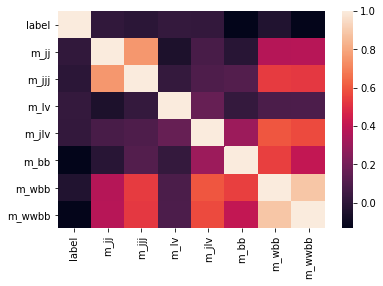

In [29]:
# create a new dataframe 
Higgs_1000_pick = Higgs_1000[['label', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']]
samp = Higgs_1000_pick.sample(1000)


corr = samp.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001435C5D7848>,
      dtype=object)

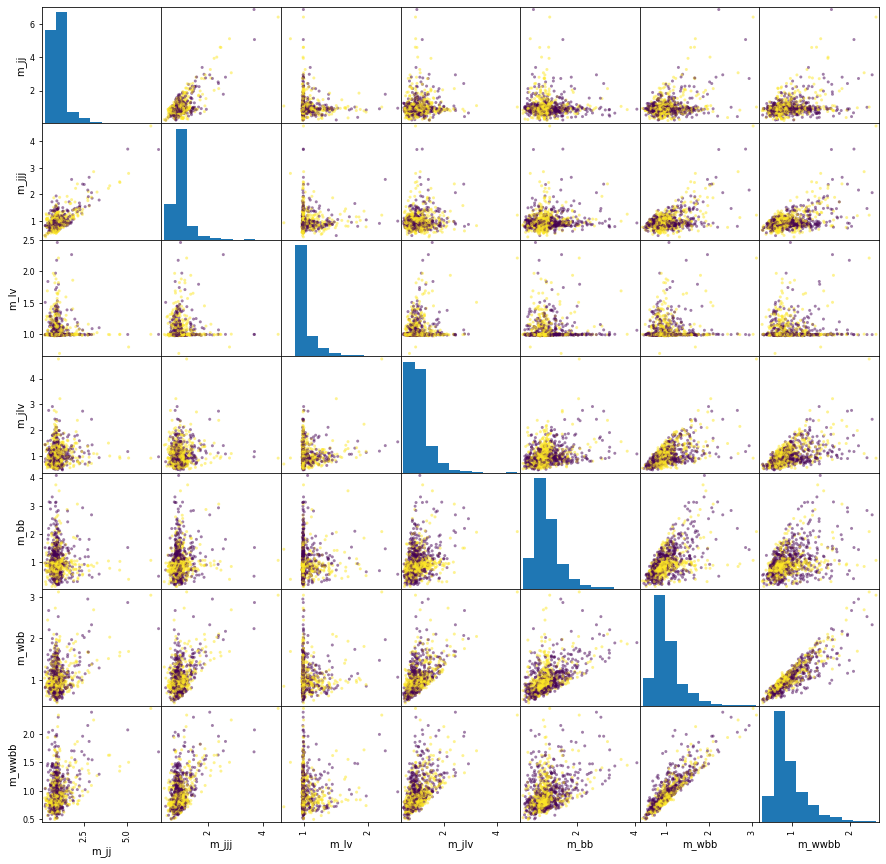

In [30]:
# create a new dataframe 
pd.plotting.scatter_matrix(Higgs_1000_pick[['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']], c=Higgs_1000_pick['label'],
                           figsize=(15,15))

plt.show()

## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [103]:
Higgs_10000 = Higgs.sample(10000)
target = Higgs_10000[['label']]
Higgs_10000.drop(['label'],inplace=True, axis=1)

In [36]:
target = Higgs_1000[['label']]
Higgs_1000.drop(['label'],inplace=True, axis=1)

In [5]:
Higgs_100000 = Higgs.sample(100000, random_state=om_state=om_state=42)
target = Higgs_100000[['label']]
Higgs_100000.drop(['label'],inplace=True, axis=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_train = scaler.fit_transform(Higgs_1000)
#scaled_train = scaler.fit_transform(Higgs_10000)
scaled_train = scaler.fit_transform(Higgs_100000)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[7], scaler.min_[7]))
multiplied_by = scaler.scale_[7]
added = scaler.min_[7]

scaled_train_df = pd.DataFrame(scaled_train, columns=Higgs_100000.columns.values)

Note: median values were scaled by multiplying by 0.2871342739 and adding 0.499969


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

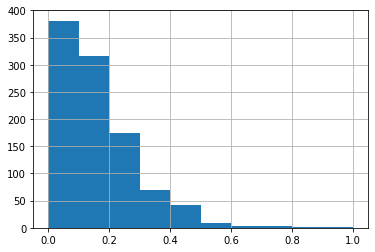

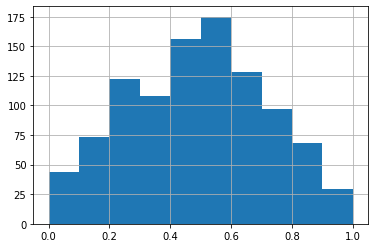

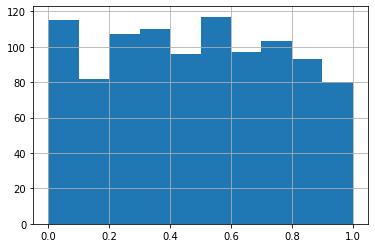

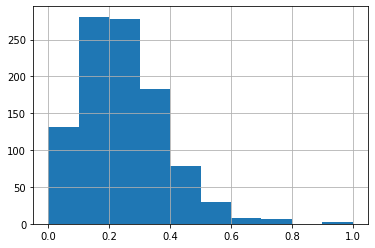

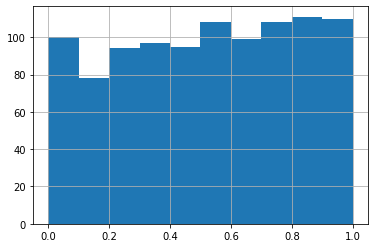

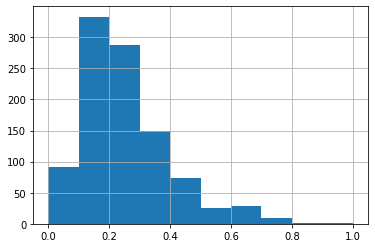

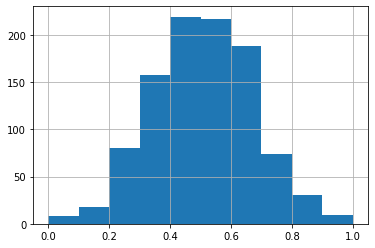

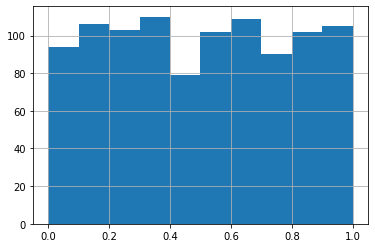

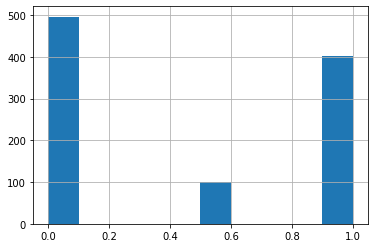

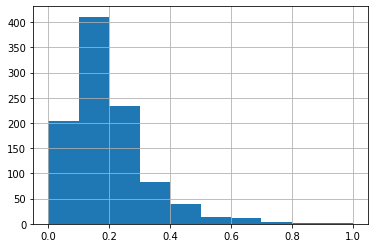

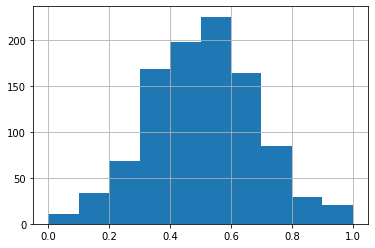

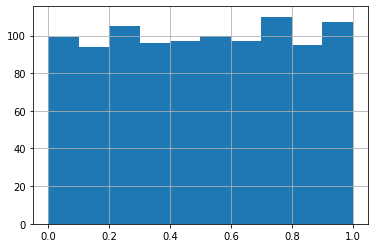

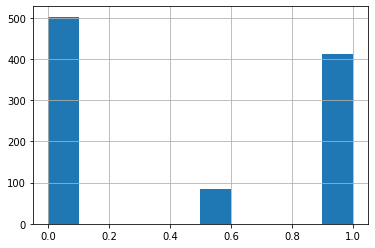

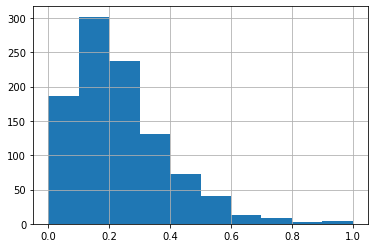

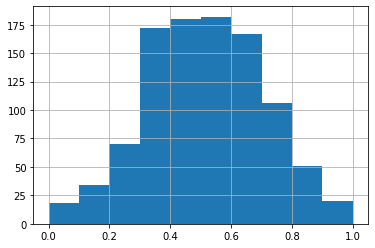

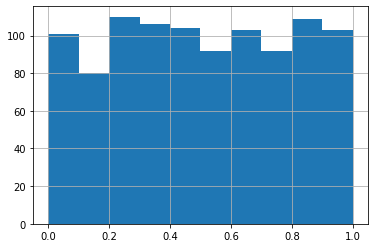

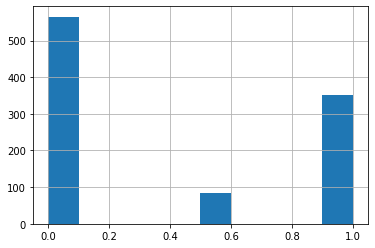

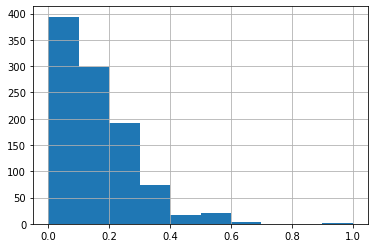

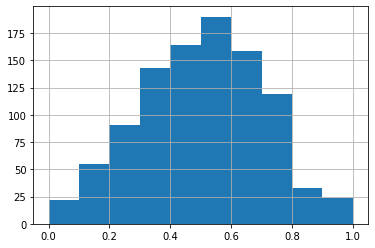

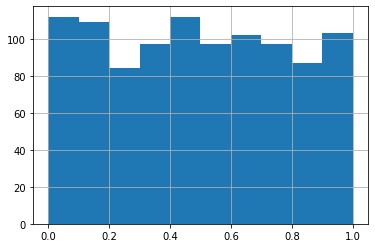

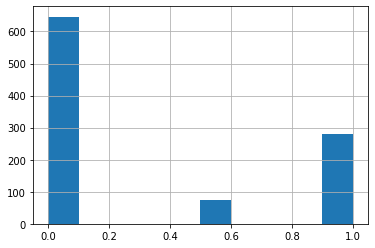

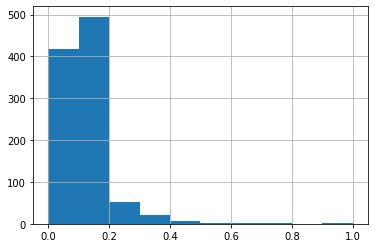

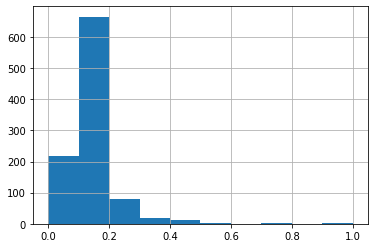

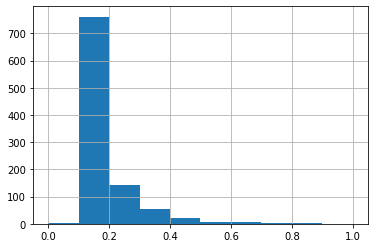

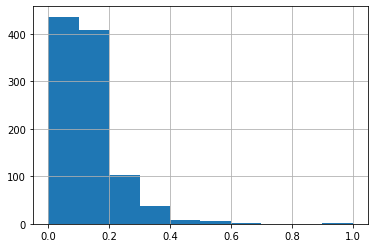

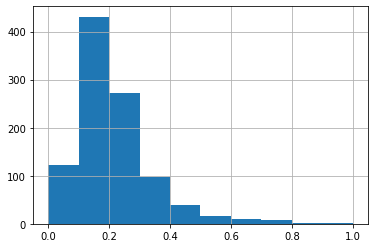

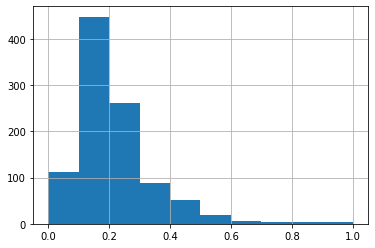

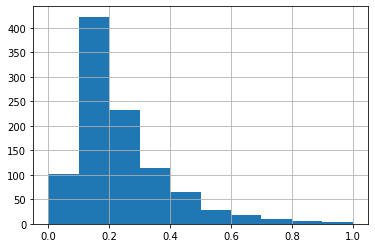

In [39]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, target, test_size=0.20, random_state=1776)

## Model 
Alright lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

In [10]:
x_train.shape

(80000, 28)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from sklearn import datasets
import sklearn
import pandas as pd
import numpy as np
print(tf.__version__)

2.4.1


# Num of Neutron Test

In [180]:
model0 = tf.keras.Sequential()
model0.add(tf.keras.Input(shape=(28,)))
model0.add(layers.Dense(32,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model0.add(layers.Dense(16, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model0.add(layers.Dense(1 ,activation='sigmoid'))

In [181]:
model0.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [182]:
model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=30, batch_size=40,callbacks=[tb])

Epoch 1/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6841 - accuracy: 0.5490 - val_loss: 0.6547 - val_accuracy: 0.6095
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6496 - accuracy: 0.6151 - val_loss: 0.6385 - val_accuracy: 0.6323
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6392 - accuracy: 0.6310 - val_loss: 0.6309 - val_accuracy: 0.6441
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6307 - accuracy: 0.6409 - val_loss: 0.6260 - val_accuracy: 0.6495
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6258 - accuracy: 0.6466 - val_loss: 0.6200 - val_accuracy: 0.6608
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6207 - accuracy: 0.6543 - val_loss: 0.6128 - val_accuracy: 0.6630
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6161 - accuracy: 0.6607 - val_loss: 0.6099 - val_accuracy:

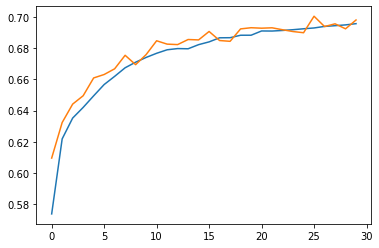

In [185]:
train_acc = model0.history.history['accuracy']
val_acc = model0.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [137]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model.add(layers.Dense(1 ,activation='sigmoid'))

## Compile Model

The compile step adds an optimizer (solver) and your loss metrics.

In [53]:
# model.compile(optimizer='adam',
#               loss='mean_squared_error',
#               metrics=['mean_squared_error','mean_absolute_error'])

In [143]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Fit model
Now it is time to train

In [133]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")

In [145]:
 model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=30, batch_size=4,callbacks=[tb])

Epoch 1/30
20000/20000 [==============================] - 38s 2ms/step - loss: 0.6491 - accuracy: 0.6154 - val_loss: 0.6386 - val_accuracy: 0.6247
Epoch 2/30
20000/20000 [==============================] - 27s 1ms/step - loss: 0.6257 - accuracy: 0.6463 - val_loss: 0.6150 - val_accuracy: 0.6624
Epoch 3/30
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6118 - accuracy: 0.6620 - val_loss: 0.6172 - val_accuracy: 0.6509
Epoch 4/30
20000/20000 [==============================] - 28s 1ms/step - loss: 0.6030 - accuracy: 0.6716 - val_loss: 0.5925 - val_accuracy: 0.6831
Epoch 5/30
20000/20000 [==============================] - 33s 2ms/step - loss: 0.5970 - accuracy: 0.6770 - val_loss: 0.5868 - val_accuracy: 0.6880
Epoch 6/30
20000/20000 [==============================] - 51s 3ms/step - loss: 0.5926 - accuracy: 0.6791 - val_loss: 0.5876 - val_accuracy: 0.6825
Epoch 7/30
20000/20000 [==============================] - 77s 4ms/step - loss: 0.5889 - accuracy: 0.6833 - val_loss: 0

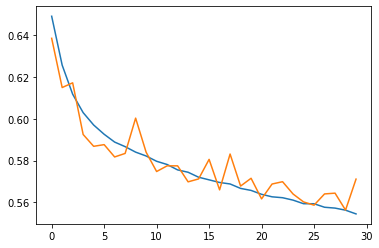

In [146]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

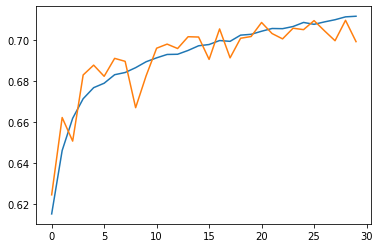

In [147]:
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [218]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=30, batch_size=40,callbacks=[tb])

Epoch 1/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.5271 - accuracy: 0.7314 - val_loss: 0.5498 - val_accuracy: 0.7161
Epoch 2/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5272 - accuracy: 0.7307 - val_loss: 0.5545 - val_accuracy: 0.7168
Epoch 3/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.5266 - accuracy: 0.7308 - val_loss: 0.5541 - val_accuracy: 0.7160
Epoch 4/30
2000/2000 [==============================] - 7s 3ms/step - loss: 0.5266 - accuracy: 0.7308 - val_loss: 0.5518 - val_accuracy: 0.7161
Epoch 5/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5260 - accuracy: 0.7311 - val_loss: 0.5504 - val_accuracy: 0.7178
Epoch 6/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5260 - accuracy: 0.7316 - val_loss: 0.5506 - val_accuracy: 0.7169
Epoch 7/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5257 - accuracy: 0.7316 - val_loss: 0.5530 - val_accuracy

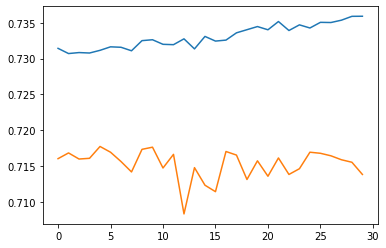

In [219]:
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [153]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(28,)))
model2.add(layers.Dense(500,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model2.add(layers.Dense(100, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model2.add(layers.Dense(1 ,activation='sigmoid'),)

In [154]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [158]:
%%time
model2.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=40,callbacks=[tb])

Epoch 1/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6033 - accuracy: 0.6717 - val_loss: 0.5984 - val_accuracy: 0.6757
Epoch 2/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5976 - accuracy: 0.6774 - val_loss: 0.5939 - val_accuracy: 0.6827
Epoch 3/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5932 - accuracy: 0.6802 - val_loss: 0.5858 - val_accuracy: 0.6862
Epoch 4/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5884 - accuracy: 0.6836 - val_loss: 0.5855 - val_accuracy: 0.6870
Epoch 5/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5850 - accuracy: 0.6869 - val_loss: 0.5873 - val_accuracy: 0.6798
Epoch 6/50
2000/2000 [==============================] - 7s 3ms/step - loss: 0.5823 - accuracy: 0.6889 - val_loss: 0.5913 - val_accuracy: 0.6801
Epoch 7/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5790 - accuracy: 0.6914 - val_loss: 0.5762 - val_accuracy:

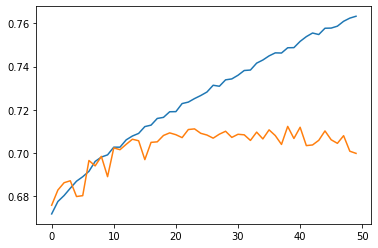

In [159]:
train_acc = model2.history.history['accuracy']
val_acc = model2.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

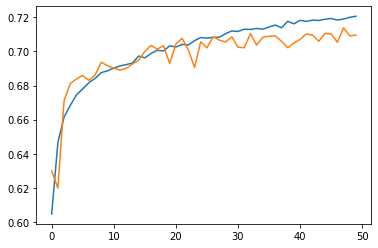

In [48]:
train_acc = model2.history.history['accuracy']
val_acc = model2.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [52]:
val_auc = model2.history.history['val_AUC']
plt.plot(val_auc)

KeyError: 'val_AUC'

In [160]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.Input(shape=(28,)))
model3.add(layers.Dense(1000,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model3.add(layers.Dense(200, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model3.add(layers.Dense(1 ,activation='sigmoid'),)

In [161]:
model3.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [162]:
 model3.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=40,callbacks=[tb])

Epoch 1/50
2000/2000 [==============================] - 10s 5ms/step - loss: 0.6698 - accuracy: 0.5757 - val_loss: 0.6333 - val_accuracy: 0.6363
Epoch 2/50
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6338 - accuracy: 0.6353 - val_loss: 0.6123 - val_accuracy: 0.6626
Epoch 3/50
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6151 - accuracy: 0.6578 - val_loss: 0.6054 - val_accuracy: 0.6658
Epoch 4/50
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6061 - accuracy: 0.6665 - val_loss: 0.6117 - val_accuracy: 0.6611
Epoch 5/50
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5952 - accuracy: 0.6786 - val_loss: 0.5885 - val_accuracy: 0.6863
Epoch 6/50
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5911 - accuracy: 0.6816 - val_loss: 0.5844 - val_accuracy: 0.6878
Epoch 7/50
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5847 - accuracy: 0.6861 - val_loss: 0.5874 - val_accuracy

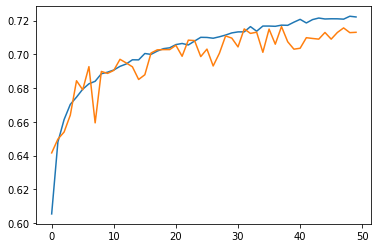

In [84]:
train_acc = model3.history.history['accuracy']
val_acc = model3.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [86]:
 model3.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=4,callbacks=[tb])

Epoch 1/100
20000/20000 [==============================] - 94s 5ms/step - loss: 0.5410 - accuracy: 0.7230 - val_loss: 0.5512 - val_accuracy: 0.7179
Epoch 2/100
20000/20000 [==============================] - 85s 4ms/step - loss: 0.5402 - accuracy: 0.7225 - val_loss: 0.5583 - val_accuracy: 0.7129ss: 0
Epoch 3/100
20000/20000 [==============================] - 66s 3ms/step - loss: 0.5392 - accuracy: 0.7238 - val_loss: 0.5559 - val_accuracy: 0.7115
Epoch 4/100
20000/20000 [==============================] - 60s 3ms/step - loss: 0.5388 - accuracy: 0.7231 - val_loss: 0.5641 - val_accuracy: 0.7094
Epoch 5/100
20000/20000 [==============================] - 60s 3ms/step - loss: 0.5389 - accuracy: 0.7247 - val_loss: 0.5606 - val_accuracy: 0.7125
Epoch 6/100
20000/20000 [==============================] - 60s 3ms/step - loss: 0.5379 - accuracy: 0.7237 - val_loss: 0.5567 - val_accuracy: 0.7192
Epoch 7/100
20000/20000 [==============================] - 60s 3ms/step - loss: 0.5389 - accuracy: 0.7231 -

20000/20000 [==============================] - 48s 2ms/step - loss: 0.5262 - accuracy: 0.7336 - val_loss: 0.5618 - val_accuracy: 0.7192
Epoch 57/100
20000/20000 [==============================] - 49s 2ms/step - loss: 0.5257 - accuracy: 0.7327 - val_loss: 0.5578 - val_accuracy: 0.7174
Epoch 58/100
20000/20000 [==============================] - 57s 3ms/step - loss: 0.5260 - accuracy: 0.7334 - val_loss: 0.5638 - val_accuracy: 0.7160
Epoch 59/100
20000/20000 [==============================] - 51s 3ms/step - loss: 0.5248 - accuracy: 0.7337 - val_loss: 0.5693 - val_accuracy: 0.7114
Epoch 60/100
20000/20000 [==============================] - 47s 2ms/step - loss: 0.5254 - accuracy: 0.7337 - val_loss: 0.5706 - val_accuracy: 0.7154
Epoch 61/100
20000/20000 [==============================] - 47s 2ms/step - loss: 0.5258 - accuracy: 0.7327 - val_loss: 0.5585 - val_accuracy: 0.7171
Epoch 62/100
20000/20000 [==============================] - 47s 2ms/step - loss: 0.5247 - accuracy: 0.7337 - val_loss: 

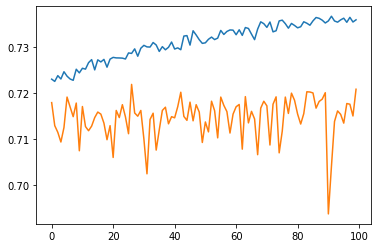

In [87]:
train_acc = model3.history.history['accuracy']
val_acc = model3.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

# Num of Layers Test

In [164]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.Input(shape=(28,)))
model4.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model4.add(layers.Dense(100,activation='relu'))  
model4.add(layers.Dense(100,activation='relu'))  
model4.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model4.add(layers.Dense(1 ,activation='sigmoid'),)

In [165]:
model4.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [166]:
model4.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=40,callbacks=[tb])

Epoch 1/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6779 - accuracy: 0.5618 - val_loss: 0.6380 - val_accuracy: 0.6270
Epoch 2/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6348 - accuracy: 0.6337 - val_loss: 0.6231 - val_accuracy: 0.6428
Epoch 3/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6220 - accuracy: 0.6504 - val_loss: 0.6091 - val_accuracy: 0.6658
Epoch 4/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6096 - accuracy: 0.6630 - val_loss: 0.6009 - val_accuracy: 0.6709
Epoch 5/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6002 - accuracy: 0.6688 - val_loss: 0.5981 - val_accuracy: 0.6730
Epoch 6/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5906 - accuracy: 0.6809 - val_loss: 0.5891 - val_accuracy: 0.6805
Epoch 7/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5869 - accuracy: 0.6843 - val_loss: 0.5923 - val_accuracy:

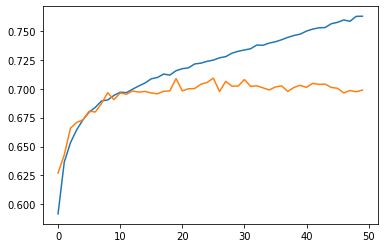

In [167]:
train_acc = model4.history.history['accuracy']
val_acc = model4.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

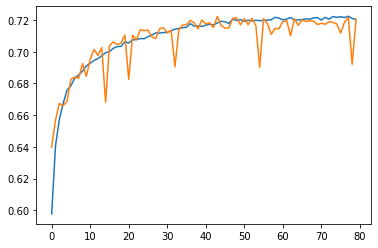

In [92]:
train_acc = model4.history.history['accuracy']
val_acc = model4.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [168]:
model5 = tf.keras.Sequential()
model5.add(tf.keras.Input(shape=(28,)))
model5.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model5.add(layers.Dropout(0.2))
model5.add(layers.Dense(100,activation='relu'))  
model5.add(layers.Dropout(0.2))
model5.add(layers.Dense(100,activation='relu'))  
model5.add(layers.Dropout(0.2))
model5.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model5.add(layers.Dropout(0.2))
model5.add(layers.Dense(1 ,activation='sigmoid'),)

In [169]:
model5.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [170]:
model5.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=40,callbacks=[tb])

Epoch 1/50
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6866 - accuracy: 0.5382 - val_loss: 0.6482 - val_accuracy: 0.6147
Epoch 2/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6541 - accuracy: 0.6110 - val_loss: 0.6330 - val_accuracy: 0.6374
Epoch 3/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6394 - accuracy: 0.6288 - val_loss: 0.6216 - val_accuracy: 0.6507
Epoch 4/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6312 - accuracy: 0.6438 - val_loss: 0.6191 - val_accuracy: 0.6623
Epoch 5/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6219 - accuracy: 0.6523 - val_loss: 0.6074 - val_accuracy: 0.6727
Epoch 6/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6184 - accuracy: 0.6589 - val_loss: 0.6076 - val_accuracy: 0.6671
Epoch 7/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6107 - accuracy: 0.6651 - val_loss: 0.6050 - val_accuracy:

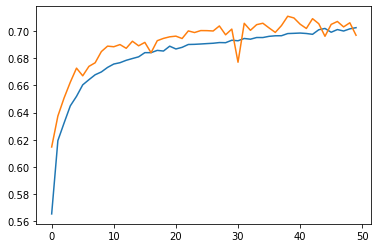

In [171]:
train_acc = model5.history.history['accuracy']
val_acc = model5.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

# Optimizer Test

In [222]:
model_rms = tf.keras.Sequential()
model_rms.add(tf.keras.Input(shape=(28,)))
model_rms.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model_rms.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model_rms.add(layers.Dense(1 ,activation='sigmoid'))

model_rms.compile(optimizer='RMSprop',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_rms.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=30, batch_size=40,callbacks=[tb])

Epoch 1/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6782 - accuracy: 0.5633 - val_loss: 0.6432 - val_accuracy: 0.6233
Epoch 2/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6434 - accuracy: 0.6253 - val_loss: 0.6346 - val_accuracy: 0.6367
Epoch 3/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6344 - accuracy: 0.6379 - val_loss: 0.6213 - val_accuracy: 0.6543
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6256 - accuracy: 0.6477 - val_loss: 0.6188 - val_accuracy: 0.6568
Epoch 5/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6125 - accuracy: 0.6652 - val_loss: 0.6062 - val_accuracy: 0.6713
Epoch 6/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6048 - accuracy: 0.6699 - val_loss: 0.6086 - val_accuracy: 0.6576
Epoch 7/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6008 - accuracy: 0.6737 - val_loss: 0.5917 - val_accuracy:

In [203]:
model_nadam = tf.keras.Sequential()
model_nadam.add(tf.keras.Input(shape=(28,)))
model_nadam.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model_nadam.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model_nadam.add(layers.Dense(1 ,activation='sigmoid'))

In [204]:
model_nadam.compile(optimizer='nadam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [205]:
model_nadam.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=30, batch_size=40,callbacks=[tb])

Epoch 1/30
2000/2000 [==============================] - 12s 4ms/step - loss: 0.6744 - accuracy: 0.5703 - val_loss: 0.6424 - val_accuracy: 0.6236
Epoch 2/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6385 - accuracy: 0.6311 - val_loss: 0.6279 - val_accuracy: 0.6485
Epoch 3/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6274 - accuracy: 0.6451 - val_loss: 0.6335 - val_accuracy: 0.6389
Epoch 4/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6181 - accuracy: 0.6562 - val_loss: 0.6095 - val_accuracy: 0.6661
Epoch 5/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6072 - accuracy: 0.6674 - val_loss: 0.6049 - val_accuracy: 0.6647
Epoch 6/30
2000/2000 [==============================] - 7s 3ms/step - loss: 0.5971 - accuracy: 0.6787 - val_loss: 0.5987 - val_accuracy: 0.6726
Epoch 7/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5950 - accuracy: 0.6804 - val_loss: 0.5890 - val_accuracy

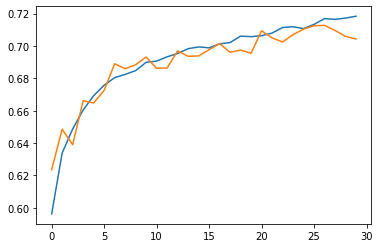

In [206]:
train_acc = model_nadam.history.history['accuracy']
val_acc = model_nadam.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [193]:
model_sgd = tf.keras.Sequential()
model_sgd.add(tf.keras.Input(shape=(28,)))
model_sgd.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model_sgd.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model_sgd.add(layers.Dense(1 ,activation='sigmoid'))

In [213]:
model_sgd.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [214]:
 model_sgd.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=30, batch_size=40,callbacks=[tb])

Epoch 1/30
2000/2000 [==============================] - 9s 4ms/step - loss: 0.5360 - accuracy: 0.7268 - val_loss: 0.5548 - val_accuracy: 0.7129
Epoch 2/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.5349 - accuracy: 0.7249 - val_loss: 0.5550 - val_accuracy: 0.7084
Epoch 3/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.5346 - accuracy: 0.7287 - val_loss: 0.5535 - val_accuracy: 0.7109
Epoch 4/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.5317 - accuracy: 0.7299 - val_loss: 0.5522 - val_accuracy: 0.7146
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5319 - accuracy: 0.7282 - val_loss: 0.5528 - val_accuracy: 0.7133
Epoch 6/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.5323 - accuracy: 0.7286 - val_loss: 0.5553 - val_accuracy: 0.7089
Epoch 7/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.5317 - accuracy: 0.7290 - val_loss: 0.5560 - val_accuracy:

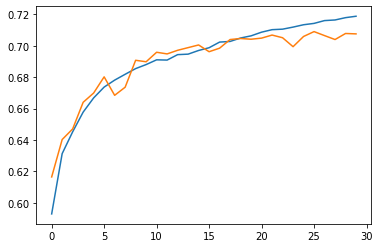

In [197]:
train_acc = model_sgd.history.history['accuracy']
val_acc = model_sgd.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

# Baseline Model from paper

In [21]:
# https://www.tensorflow.org/api_docs/python/tf/keras/initializers/RandomNormal
first_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.1, seed=42)
outer_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.001, seed=42)
other_initializers = tf.keras.initializers.RandomNormal(mean=0., stddev=0.05, seed=42)

# Top Layer (https://www.quora.com/Are-the-top-layers-of-a-deep-neural-network-the-first-layers-or-the-last-layers)
# Weight Decay: https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/
weight_decay=0.00001
paper_model = tf.keras.Sequential([
    layers.Dense(300, activation='tanh', input_shape=(28,), kernel_initializer=first_initializer, kernel_regularizer=l2(weight_decay)),
    layers.Dense(300, activation='tanh', kernel_initializer=other_initializers, kernel_regularizer=l2(weight_decay)),
    layers.Dense(300, activation='tanh', kernel_initializer=other_initializers, kernel_regularizer=l2(weight_decay)),
    layers.Dense(300, activation='tanh', kernel_initializer=other_initializers, kernel_regularizer=l2(weight_decay)),
    layers.Dropout(0.5), # Top Hidden Layer
    layers.Dense(1, activation='sigmoid', kernel_initializer=outer_initializer, kernel_regularizer=l2(weight_decay))
    
])

In [22]:
paper_model.compile(optimizer='sgd',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                # loss=tf.keras.metrics.AUC(),
                metrics=[
                  tf.keras.metrics.AUC(name='AUC'),
                  tf.keras.losses.BinaryCrossentropy(from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

In [23]:
 paper_model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=4,callbacks=[tb])

Epoch 1/50
20000/20000 [==============================] - 101s 5ms/step - loss: 0.6943 - AUC: 0.5490 - binary_crossentropy: 0.6868 - accuracy: 0.5476 - val_loss: 0.6754 - val_AUC: 0.6320 - val_binary_crossentropy: 0.6679 - val_accuracy: 0.5836
Epoch 2/50
20000/20000 [==============================] - 97s 5ms/step - loss: 0.6772 - AUC: 0.6147 - binary_crossentropy: 0.6696 - accuracy: 0.5858 - val_loss: 0.6596 - val_AUC: 0.6548 - val_binary_crossentropy: 0.6520 - val_accuracy: 0.6162
Epoch 3/50
20000/20000 [==============================] - 97s 5ms/step - loss: 0.6681 - AUC: 0.6357 - binary_crossentropy: 0.6606 - accuracy: 0.5997 - val_loss: 0.6697 - val_AUC: 0.6545 - val_binary_crossentropy: 0.6621 - val_accuracy: 0.5985
Epoch 4/50
20000/20000 [==============================] - 96s 5ms/step - loss: 0.6658 - AUC: 0.6405 - binary_crossentropy: 0.6582 - accuracy: 0.6020 - val_loss: 0.6536 - val_AUC: 0.6666 - val_binary_crossentropy: 0.6461 - val_accuracy: 0.6227
Epoch 5/50
20000/20000 [===

Epoch 35/50
20000/20000 [==============================] - 94s 5ms/step - loss: 0.6180 - AUC: 0.7234 - binary_crossentropy: 0.6101 - accuracy: 0.6621 - val_loss: 0.6086 - val_AUC: 0.7432 - val_binary_crossentropy: 0.6007 - val_accuracy: 0.6788
Epoch 36/50
20000/20000 [==============================] - 94s 5ms/step - loss: 0.6167 - AUC: 0.7262 - binary_crossentropy: 0.6088 - accuracy: 0.6663 - val_loss: 0.6117 - val_AUC: 0.7349 - val_binary_crossentropy: 0.6038 - val_accuracy: 0.6694
Epoch 37/50
20000/20000 [==============================] - 94s 5ms/step - loss: 0.6180 - AUC: 0.7238 - binary_crossentropy: 0.6101 - accuracy: 0.6631 - val_loss: 0.6094 - val_AUC: 0.7440 - val_binary_crossentropy: 0.6015 - val_accuracy: 0.6706
Epoch 38/50
20000/20000 [==============================] - 94s 5ms/step - loss: 0.6164 - AUC: 0.7266 - binary_crossentropy: 0.6085 - accuracy: 0.6669 - val_loss: 0.6062 - val_AUC: 0.7465 - val_binary_crossentropy: 0.5983 - val_accuracy: 0.6705
Epoch 39/50
20000/20000 

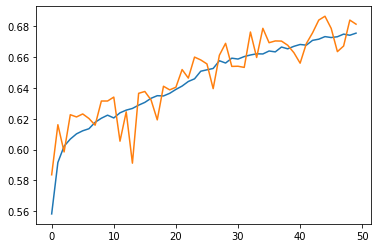

In [24]:
train_acc = paper_model.history.history['accuracy']
val_acc = paper_model.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

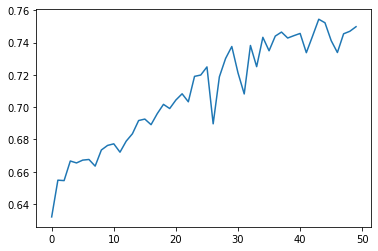

In [30]:
val_auc = paper_model.history.history['val_AUC']
plt.plot(val_auc)

# Using same optimizer (sgd), vary layers

In [31]:
medium_model = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(28,)),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1,activation='sigmoid')
])

In [32]:
medium_model.compile(optimizer='sgd',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                # loss=tf.keras.metrics.AUC(),
                metrics=[
                  tf.keras.metrics.AUC(name='AUC'),
                  tf.keras.losses.BinaryCrossentropy(from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

In [33]:
medium_model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=12,callbacks=[tb])

Epoch 1/50
6667/6667 [==============================] - 15s 2ms/step - loss: 0.6906 - AUC: 0.5255 - binary_crossentropy: 0.6906 - accuracy: 0.5356 - val_loss: 0.6809 - val_AUC: 0.5848 - val_binary_crossentropy: 0.6809 - val_accuracy: 0.5627
Epoch 2/50
6667/6667 [==============================] - 14s 2ms/step - loss: 0.6778 - AUC: 0.5927 - binary_crossentropy: 0.6778 - accuracy: 0.5666 - val_loss: 0.6628 - val_AUC: 0.6347 - val_binary_crossentropy: 0.6628 - val_accuracy: 0.5946
Epoch 3/50
6667/6667 [==============================] - 14s 2ms/step - loss: 0.6634 - AUC: 0.6296 - binary_crossentropy: 0.6634 - accuracy: 0.5939 - val_loss: 0.6502 - val_AUC: 0.6611 - val_binary_crossentropy: 0.6502 - val_accuracy: 0.6169
Epoch 4/50
6667/6667 [==============================] - 13s 2ms/step - loss: 0.6586 - AUC: 0.6397 - binary_crossentropy: 0.6586 - accuracy: 0.6004 - val_loss: 0.6484 - val_AUC: 0.6642 - val_binary_crossentropy: 0.6484 - val_accuracy: 0.6209
Epoch 5/50
6667/6667 [==============

Epoch 35/50
6667/6667 [==============================] - 12s 2ms/step - loss: 0.6222 - AUC: 0.7101 - binary_crossentropy: 0.6222 - accuracy: 0.6538 - val_loss: 0.6221 - val_AUC: 0.7143 - val_binary_crossentropy: 0.6220 - val_accuracy: 0.6511
Epoch 36/50
6667/6667 [==============================] - 12s 2ms/step - loss: 0.6207 - AUC: 0.7117 - binary_crossentropy: 0.6207 - accuracy: 0.6560 - val_loss: 0.6278 - val_AUC: 0.7126 - val_binary_crossentropy: 0.6278 - val_accuracy: 0.6481
Epoch 37/50
6667/6667 [==============================] - 12s 2ms/step - loss: 0.6169 - AUC: 0.7177 - binary_crossentropy: 0.6169 - accuracy: 0.6578 - val_loss: 0.6157 - val_AUC: 0.7199 - val_binary_crossentropy: 0.6157 - val_accuracy: 0.6590
Epoch 38/50
6667/6667 [==============================] - 12s 2ms/step - loss: 0.6178 - AUC: 0.7146 - binary_crossentropy: 0.6178 - accuracy: 0.6565 - val_loss: 0.6134 - val_AUC: 0.7243 - val_binary_crossentropy: 0.6134 - val_accuracy: 0.6665
Epoch 39/50
6667/6667 [=========

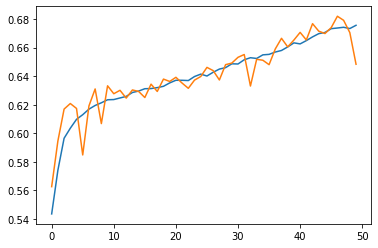

In [34]:
train_acc = medium_model.history.history['accuracy']
val_acc = medium_model.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

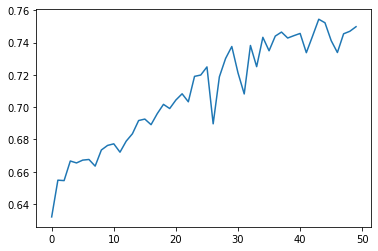

In [51]:
val_auc = paper_model.history.history['val_AUC']
plt.plot(val_auc)

In [36]:
large_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(28,)),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(1,activation='sigmoid')
])

In [37]:
large_model.compile(optimizer='sgd',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                # loss=tf.keras.metrics.AUC(),
                metrics=[
                  tf.keras.metrics.AUC(name='AUC'),
                  tf.keras.losses.BinaryCrossentropy(from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

In [38]:
large_model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=12,callbacks=[tb])

Epoch 1/50
6667/6667 [==============================] - 76s 11ms/step - loss: 0.6864 - AUC: 0.5526 - binary_crossentropy: 0.6864 - accuracy: 0.5448 - val_loss: 0.6649 - val_AUC: 0.6382 - val_binary_crossentropy: 0.6649 - val_accuracy: 0.5934
Epoch 2/50
6667/6667 [==============================] - 73s 11ms/step - loss: 0.6676 - AUC: 0.6181 - binary_crossentropy: 0.6676 - accuracy: 0.5880 - val_loss: 0.6638 - val_AUC: 0.6551 - val_binary_crossentropy: 0.6638 - val_accuracy: 0.5831
Epoch 3/50
6667/6667 [==============================] - 73s 11ms/step - loss: 0.6606 - AUC: 0.6349 - binary_crossentropy: 0.6606 - accuracy: 0.6013 - val_loss: 0.6812 - val_AUC: 0.6604 - val_binary_crossentropy: 0.6812 - val_accuracy: 0.5571
Epoch 4/50
6667/6667 [==============================] - 73s 11ms/step - loss: 0.6563 - AUC: 0.6449 - binary_crossentropy: 0.6563 - accuracy: 0.6060 - val_loss: 0.6773 - val_AUC: 0.6688 - val_binary_crossentropy: 0.6773 - val_accuracy: 0.5801
Epoch 5/50
6667/6667 [==========

Epoch 35/50
6667/6667 [==============================] - 63s 9ms/step - loss: 0.6130 - AUC: 0.7211 - binary_crossentropy: 0.6130 - accuracy: 0.6618 - val_loss: 0.6055 - val_AUC: 0.7362 - val_binary_crossentropy: 0.6055 - val_accuracy: 0.6745
Epoch 36/50
6667/6667 [==============================] - 62s 9ms/step - loss: 0.6126 - AUC: 0.7208 - binary_crossentropy: 0.6126 - accuracy: 0.6597 - val_loss: 0.6009 - val_AUC: 0.7375 - val_binary_crossentropy: 0.6008 - val_accuracy: 0.6712
Epoch 37/50
6667/6667 [==============================] - 62s 9ms/step - loss: 0.6105 - AUC: 0.7252 - binary_crossentropy: 0.6105 - accuracy: 0.6661 - val_loss: 0.6049 - val_AUC: 0.7348 - val_binary_crossentropy: 0.6049 - val_accuracy: 0.6721
Epoch 38/50
6667/6667 [==============================] - 62s 9ms/step - loss: 0.6089 - AUC: 0.7263 - binary_crossentropy: 0.6089 - accuracy: 0.6660 - val_loss: 0.6061 - val_AUC: 0.7360 - val_binary_crossentropy: 0.6061 - val_accuracy: 0.6737
Epoch 39/50
6667/6667 [=========

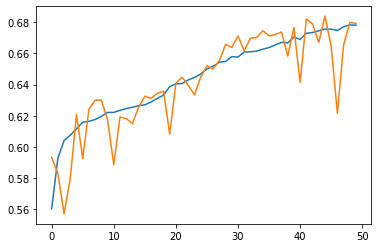

In [39]:
train_acc = large_model.history.history['accuracy']
val_acc = large_model.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

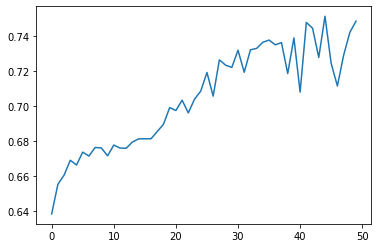

In [50]:
val_auc = large_model.history.history['val_AUC']
plt.plot(val_auc)

# Add Dropout

In [41]:
from tensorflow.keras import regularizers
combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(28,)),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')
])

combined_model.compile(optimizer='sgd',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                # loss=tf.keras.metrics.AUC(),
                metrics=[
                  tf.keras.metrics.AUC(name='AUC'),
                  tf.keras.losses.BinaryCrossentropy(from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

In [42]:
combined_model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=12,callbacks=[tb])

Epoch 1/50
6667/6667 [==============================] - 95s 14ms/step - loss: 0.8641 - AUC: 0.5089 - binary_crossentropy: 0.7066 - accuracy: 0.5126 - val_loss: 0.8387 - val_AUC: 0.5786 - val_binary_crossentropy: 0.6846 - val_accuracy: 0.5498
Epoch 2/50
6667/6667 [==============================] - 91s 14ms/step - loss: 0.8431 - AUC: 0.5391 - binary_crossentropy: 0.6901 - accuracy: 0.5354 - val_loss: 0.8282 - val_AUC: 0.5985 - val_binary_crossentropy: 0.6782 - val_accuracy: 0.5722
Epoch 3/50
6667/6667 [==============================] - 91s 14ms/step - loss: 0.8321 - AUC: 0.5734 - binary_crossentropy: 0.6832 - accuracy: 0.5547 - val_loss: 0.8171 - val_AUC: 0.6255 - val_binary_crossentropy: 0.6710 - val_accuracy: 0.5848
Epoch 4/50
6667/6667 [==============================] - 90s 13ms/step - loss: 0.8220 - AUC: 0.5950 - binary_crossentropy: 0.6770 - accuracy: 0.5725 - val_loss: 0.8065 - val_AUC: 0.6414 - val_binary_crossentropy: 0.6643 - val_accuracy: 0.5990
Epoch 5/50
6667/6667 [==========

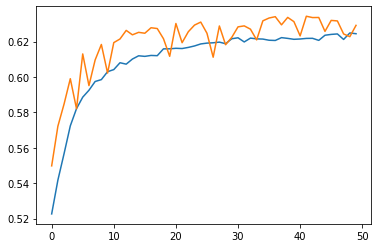

In [43]:
train_acc = combined_model.history.history['accuracy']
val_acc = combined_model.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

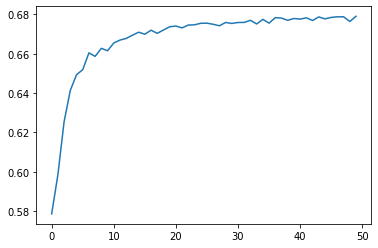

In [54]:
val_auc = combined_model.history.history['val_AUC']
plt.plot(val_auc)

In [100]:
from sklearn.metrics import roc_curve
y_pred_keras = combined_model.predict(x_test).ravel()
fpr_comb, tpr_comb, thresholds_comb = roc_curve(y_test, y_pred_keras)

In [103]:
from sklearn.metrics import auc
auc_comb = auc(fpr_comb, tpr_comb)

In [106]:
from sklearn.metrics import roc_curve
y_pred_keras = large_model.predict(x_test).ravel()
fpr_large, tpr_large, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_large = auc(fpr_large, tpr_large)

In [109]:
from sklearn.metrics import roc_curve
y_pred_keras = medium_model.predict(x_test).ravel()
fpr_medium, tpr_medium, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_medium = auc(fpr_medium, tpr_medium)

In [111]:
from sklearn.metrics import roc_curve
y_pred_keras = paper_model.predict(x_test).ravel()
fpr_paper, tpr_paper, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_paper = auc(fpr_paper, tpr_paper)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve')

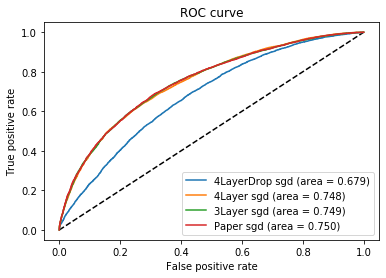

In [113]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_comb, tpr_comb, label='4LayerDrop sgd (area = {:.3f})'.format(auc_comb))
plt.plot(fpr_large, tpr_large, label='4Layer sgd (area = {:.3f})'.format(auc_large))
plt.plot(fpr_medium, tpr_medium, label='3Layer sgd (area = {:.3f})'.format(auc_medium))
plt.plot(fpr_paper, tpr_paper, label='Paper sgd (area = {:.3f})'.format(auc_paper))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [220]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(x_test).ravel()
fpr_model1, tpr_model1, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_model1 = auc(fpr_model1, tpr_model1)

In [172]:
from sklearn.metrics import roc_curve
y_pred_keras = model2.predict(x_test).ravel()
fpr_model2, tpr_model2, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_model2 = auc(fpr_model2, tpr_model2)

In [173]:
from sklearn.metrics import roc_curve
y_pred_keras = model3.predict(x_test).ravel()
fpr_model3, tpr_model3, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_model3 = auc(fpr_model3, tpr_model3)

In [174]:
from sklearn.metrics import roc_curve
y_pred_keras = model4.predict(x_test).ravel()
fpr_model4, tpr_model4, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_model4 = auc(fpr_model4, tpr_model4)

In [198]:
from sklearn.metrics import roc_curve
y_pred_keras = model5.predict(x_test).ravel()
fpr_model5, tpr_model5, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_model5 = auc(fpr_model5, tpr_model5)

In [188]:
from sklearn.metrics import roc_curve
y_pred_keras = model0.predict(x_test).ravel()
fpr_model0, tpr_model0, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_model0 = auc(fpr_model0, tpr_model0)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve')

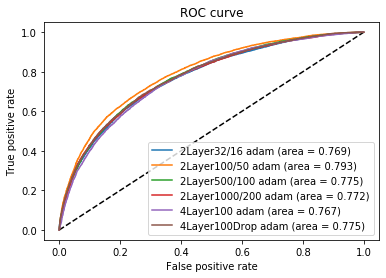

In [199]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_model0, tpr_model0, label='2Layer32/16 adam (area = {:.3f})'.format(auc_model0))
plt.plot(fpr_model1, tpr_model1, label='2Layer100/50 adam (area = {:.3f})'.format(auc_model1))
plt.plot(fpr_model2, tpr_model2, label='2Layer500/100 adam (area = {:.3f})'.format(auc_model2))
plt.plot(fpr_model3, tpr_model3, label='2Layer1000/200 adam (area = {:.3f})'.format(auc_model3))
plt.plot(fpr_model4, tpr_model4, label='4Layer100 adam (area = {:.3f})'.format(auc_model4))
plt.plot(fpr_model5, tpr_model5, label='4Layer100Drop adam (area = {:.3f})'.format(auc_model5))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [216]:
from sklearn.metrics import roc_curve
y_pred_keras = model_sgd.predict(x_test).ravel()
fpr_model_sgd, tpr_model_sgd, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_model_sgd = auc(fpr_model_sgd, tpr_model_sgd)

In [211]:
from sklearn.metrics import roc_curve
y_pred_keras = model_nadam.predict(x_test).ravel()
fpr_model_nadam, tpr_model_nadam, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_model_nadam = auc(fpr_model_nadam, tpr_model_nadam)

In [223]:
from sklearn.metrics import roc_curve
y_pred_keras = model_rms.predict(x_test).ravel()
fpr_model_rms, tpr_model_rms, thresholds_large = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_model_rms = auc(fpr_model_rms, tpr_model_rms)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve')

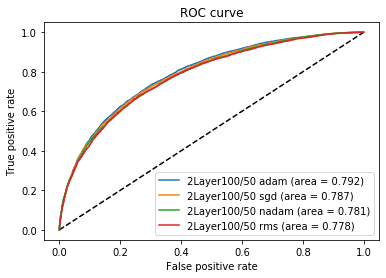

In [224]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_model1, tpr_model1, label='2Layer100/50 adam (area = {:.3f})'.format(auc_model1))
plt.plot(fpr_model_sgd, tpr_model_sgd, label='2Layer100/50 sgd (area = {:.3f})'.format(auc_model_sgd))
plt.plot(fpr_model_nadam, tpr_model_nadam, label='2Layer100/50 nadam (area = {:.3f})'.format(auc_model_nadam))
plt.plot(fpr_model_rms, tpr_model_rms, label='2Layer100/50 rms (area = {:.3f})'.format(auc_model_rms))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# TOM

## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

In [9]:
scaled_train_df.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,0.050286,0.3696,0.564642,0.021254,0.302234,0.062910,0.458153,0.186400,0.0,0.103509,...,0.497833,0.486774,1.0,0.031874,0.038707,0.113156,0.055766,0.038035,0.061924,0.067873
1,0.053521,0.5676,0.603005,0.097277,0.410339,0.097729,0.406135,0.043934,1.0,0.054424,...,0.271924,0.499667,0.0,0.005662,0.031445,0.114120,0.059877,0.041314,0.062246,0.058135
2,0.044328,0.8020,0.030563,0.029457,0.622153,0.098682,0.715905,0.896692,0.0,0.057842,...,0.725909,0.758205,0.0,0.020806,0.045090,0.114119,0.057983,0.042641,0.050959,0.055869
3,0.090466,0.3200,0.768393,0.129367,0.753154,0.168171,0.222741,0.229379,0.0,0.194996,...,0.364121,0.109675,0.0,0.021726,0.041143,0.115758,0.042198,0.046364,0.065315,0.077971
4,0.070221,0.5660,0.936646,0.057322,0.154449,0.055490,0.319773,0.235268,0.0,0.053402,...,0.425142,0.532329,0.0,0.016970,0.057617,0.114235,0.049969,0.061272,0.051523,0.059396


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

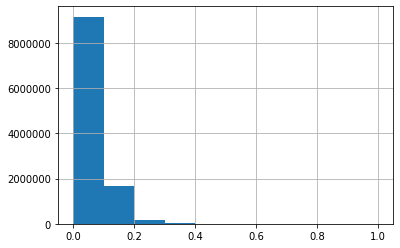

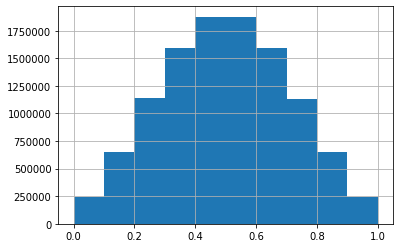

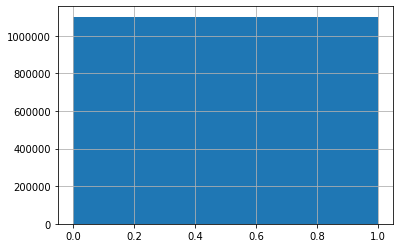

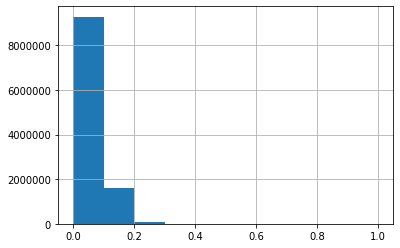

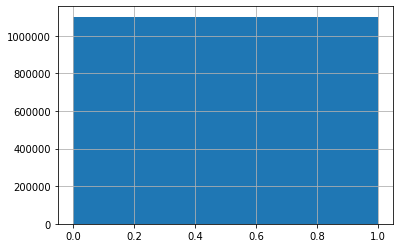

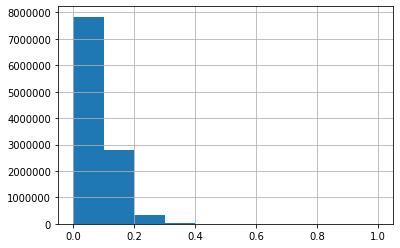

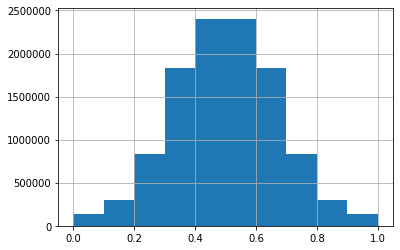

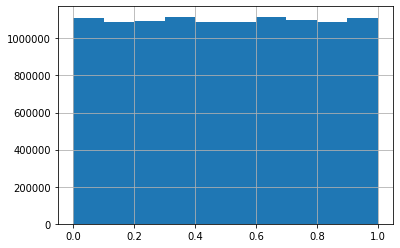

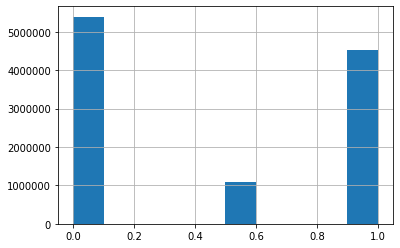

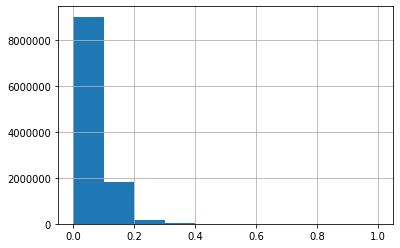

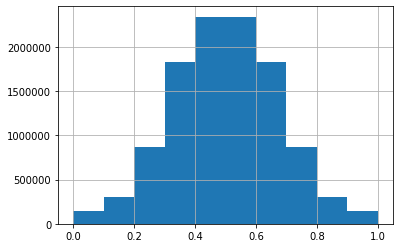

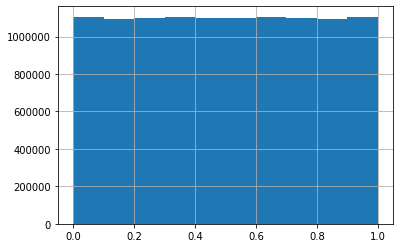

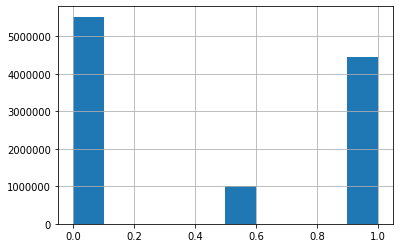

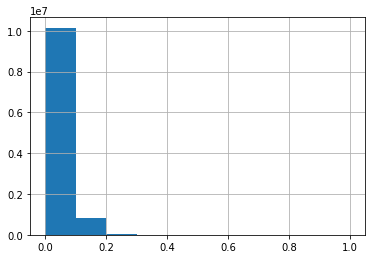

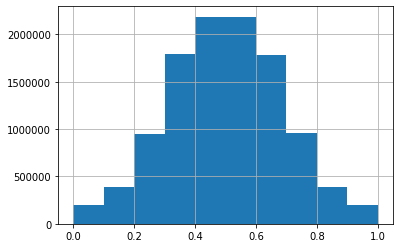

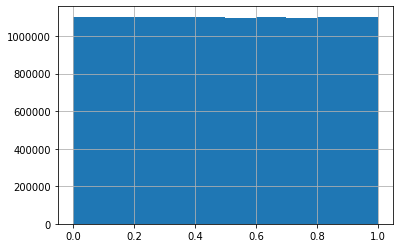

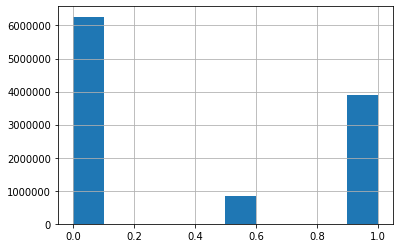

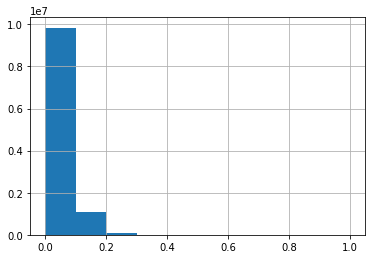

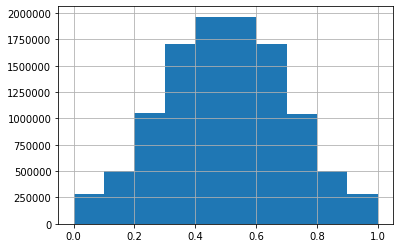

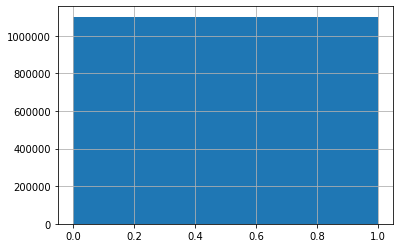

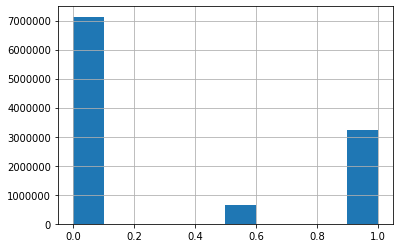

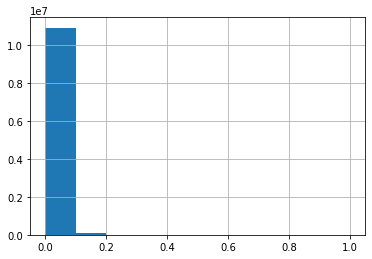

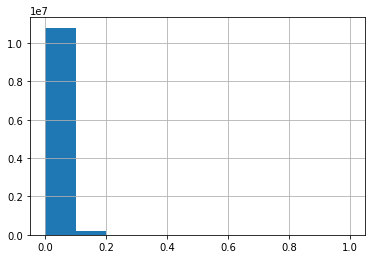

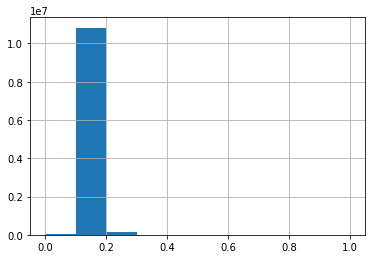

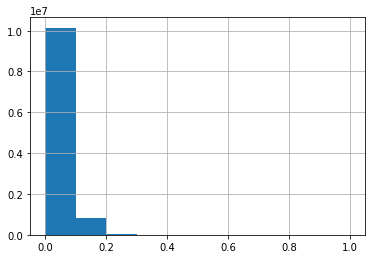

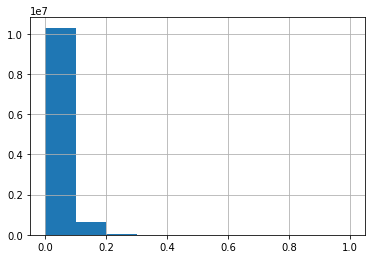

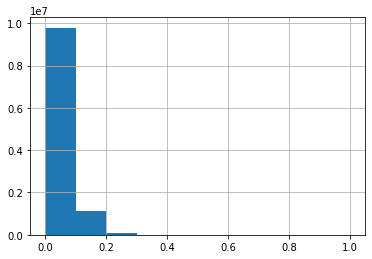

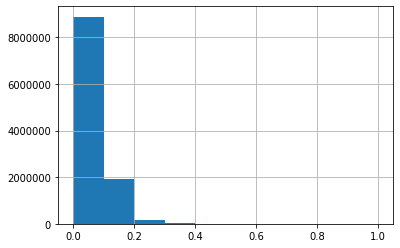

In [11]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

Neural Networks generally are one of the slowest methods, thus a full CV is not always feasable.  

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=1776)

## Model 
We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in tensorflow.  THey are closely related, but this IS Tensorflow (package), not Keras (package)

In [13]:
x_train.shape

(8800000, 28)

Sequential allows use to build a network layer by layer.  It automatically assumes that any layer you add is connected to the previous layer.  Notice we do not specify the input size.  Until we run the .fit() method, the full "graph" or set of matrix operations is not built.  

Once we have fit the model, we can call the .summary() method to get details about our model.

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, relu activation
model.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, relu activation
model.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, relu activation
model.add(layers.Dense(50, activation='sigmoid'))   # adds a layer with 50 neurons, sigmoid activation
model.add(layers.Dense(1, activation='linear'))  # adds a layer with 1 neurons, linear (aka NO) activation



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Compile Model

The compile step adds an optimizer (solver) and your loss metrics.

In [35]:
model.compile(optimizer='nadam',
              loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error','accuracy','AUC'])

In [15]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error','accuracy','AUC'])

## Fit model
Now it is time to train

In [16]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), batch_size=100)

Train on 8800000 samples, validate on 2200000 samples
Epoch 1/10
8800000/8800000 [==============================] - 196s 22us/sample - loss: 0.1913 - mean_squared_error: 0.1913 - mean_absolute_error: 0.3825 - acc: 0.7052 - auc: 0.7633 - val_loss: 0.1813 - val_mean_squared_error: 0.1813 - val_mean_absolute_error: 0.3541 - val_acc: 0.7270 - val_auc: 0.8055
Epoch 2/10
8800000/8800000 [==============================] - 197s 22us/sample - loss: 0.1759 - mean_squared_error: 0.1759 - mean_absolute_error: 0.3519 - acc: 0.7353 - auc: 0.8024 - val_loss: 0.1715 - val_mean_squared_error: 0.1715 - val_mean_absolute_error: 0.3372 - val_acc: 0.7428 - val_auc: 0.8187
Epoch 3/10
8800000/8800000 [==============================] - 196s 22us/sample - loss: 0.1712 - mean_squared_error: 0.1712 - mean_absolute_error: 0.3423 - acc: 0.7434 - auc: 0.8181 - val_loss: 0.1696 - val_mean_squared_error: 0.1696 - val_mean_absolute_error: 0.3401 - val_acc: 0.7457 - val_auc: 0.8261
Epoch 4/10
8800000/8800000 [=========

Now look at the history of the model--your train/test (aka validation) curves

In [17]:
model.history.history


{'loss': [0.1913073066167364,
  0.17592052375330505,
  0.17115653440076858,
  0.16857066910553045,
  0.16708217743936588,
  0.16603094515441494,
  0.16522256302444094,
  0.16462456672630188,
  0.16413462543072688,
  0.16372474033114584],
 'mean_squared_error': [0.19130716,
  0.17592129,
  0.1711563,
  0.16856982,
  0.16708213,
  0.16603026,
  0.16522248,
  0.16462491,
  0.16413522,
  0.16372459],
 'mean_absolute_error': [0.38248447,
  0.35189855,
  0.3423365,
  0.33717537,
  0.33421025,
  0.33212122,
  0.33052713,
  0.3293674,
  0.32839948,
  0.3276078],
 'acc': [0.70520115,
  0.7353233,
  0.7434124,
  0.747796,
  0.75037694,
  0.752106,
  0.7535981,
  0.75454146,
  0.75541306,
  0.75616556],
 'auc': [0.7633458,
  0.80238205,
  0.81814575,
  0.8242673,
  0.82817537,
  0.8291196,
  0.8295905,
  0.8294644,
  0.8303561,
  0.83030707],
 'val_loss': [0.1813082349723713,
  0.1715124726122753,
  0.1695646366619251,
  0.16893544292077423,
  0.16633547180687838,
  0.16625068635222587,
  0.16412

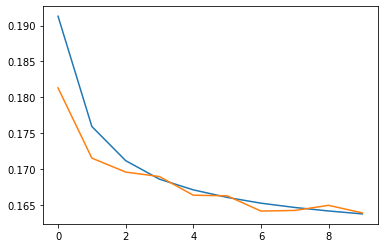

In [18]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

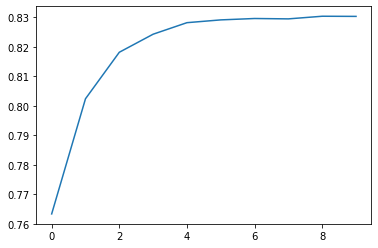

In [19]:
val_auc = model.history.history['auc']
#val_acc = model.history.history['acc']
plt.plot(val_auc)
#plt.plot(val_acc)
plt.show

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               2900      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 13,101
Trainable params: 13,101
Non-trainable params: 0
_________________________________________________________________


## Visualize that data
Tensorboard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch end.  Tensorboard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

To run tensorboard type

`tensorboard --logdir logs`

Then go to localhost:6006 in your web browser 

or use the "magic" commands in jupyter below

In [44]:
tf.keras.optimizers.RMSprop(
    learning_rate=0.01,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False
)


In [45]:
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['mean_squared_error','AUC','accuracy'])

In [46]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), batch_size=100, callbacks=[tb])

Train on 8800000 samples, validate on 2200000 samples
Epoch 1/10
8800000/8800000 [==============================] - 199s 23us/sample - loss: 0.1658 - mean_squared_error: 0.1658 - auc_8: 0.8100 - acc: 0.7535 - val_loss: 0.1678 - val_mean_squared_error: 0.1678 - val_auc_8: 0.8125 - val_acc: 0.7492
Epoch 2/10
8800000/8800000 [==============================] - 198s 23us/sample - loss: 0.1676 - mean_squared_error: 0.1676 - auc_8: 0.8219 - acc: 0.7506 - val_loss: 0.1684 - val_mean_squared_error: 0.1684 - val_auc_8: 0.8324 - val_acc: 0.7511
Epoch 3/10
8800000/8800000 [==============================] - 198s 23us/sample - loss: 0.1679 - mean_squared_error: 0.1679 - auc_8: 0.8266 - acc: 0.7501 - val_loss: 0.1700 - val_mean_squared_error: 0.1700 - val_auc_8: 0.8322 - val_acc: 0.7452
Epoch 4/10
8800000/8800000 [==============================] - 198s 23us/sample - loss: 0.1687 - mean_squared_error: 0.1687 - auc_8: 0.8265 - acc: 0.7491 - val_loss: 0.1724 - val_mean_squared_error: 0.1724 - val_auc_8:

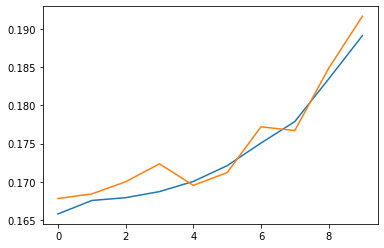

In [47]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

In [48]:
model.history.history

{'loss': [0.16580693204379218,
  0.16756605460037563,
  0.16792906419374048,
  0.16872477526530963,
  0.17005001091948627,
  0.17211061793667348,
  0.17506719987737862,
  0.1778679621212015,
  0.18343303401768207,
  0.18910812162074514],
 'mean_squared_error': [0.16580604,
  0.16756572,
  0.16793069,
  0.1687247,
  0.17005071,
  0.17211105,
  0.1750664,
  0.17786801,
  0.1834329,
  0.18910898],
 'auc_8': [0.81000173,
  0.82187647,
  0.8266454,
  0.82647485,
  0.824564,
  0.820462,
  0.8140682,
  0.8080014,
  0.795312,
  0.7820241],
 'acc': [0.75348645,
  0.75061625,
  0.75010055,
  0.7491224,
  0.74756706,
  0.74501795,
  0.74110126,
  0.7374242,
  0.7301789,
  0.72154987],
 'val_loss': [0.16781881885196676,
  0.16842328521236777,
  0.17001273847439072,
  0.17235427452149715,
  0.16953885449706155,
  0.17120287237011572,
  0.17719311942634258,
  0.17670085911114108,
  0.18482428716834295,
  0.19164063528552652],
 'val_mean_squared_error': [0.16781922,
  0.16842291,
  0.17001265,
  0.17

<function matplotlib.pyplot.show(*args, **kw)>

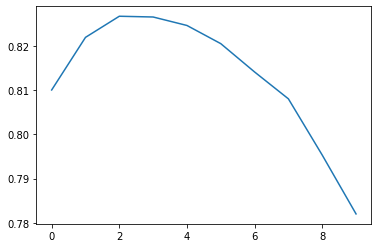

In [49]:
val_auc2 = model.history.history['auc_8']
#val_acc = model.history.history['acc']
plt.plot(val_auc2)
#plt.plot(val_acc)
plt.show

In [20]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [21]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

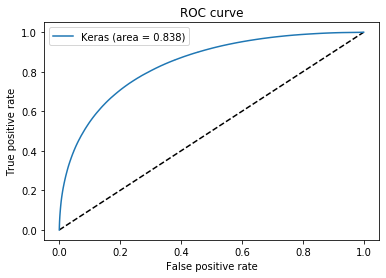

In [22]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# MICHAEL

In [3]:
import pandas as pd

df = pd.read_csv('HIGGS.csv', header = None)
#df_small = df.sample(n=100000, random_state=42)
#df_small.head()

In [26]:

x = pd.DataFrame(df_small.iloc[0: ,1:])
y = pd.DataFrame(df_small.iloc[0: ,0])
y = y.to_numpy()
y

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)
scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)
scaled_train_df.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,0.101943,0.350940,0.498235,0.020804,0.544219,0.215028,0.492410,0.084047,0.5,0.135456,...,0.011504,0.521027,0.0,0.077598,0.139742,0.130062,0.039454,0.223164,0.175842,0.171233
1,0.015331,0.708684,0.198657,0.117635,0.097608,0.458717,0.172477,0.730190,0.0,0.197007,...,0.264755,0.238134,0.0,0.044613,0.038771,0.130169,0.162790,0.044486,0.132841,0.218959
2,0.101814,0.567027,0.916908,0.083120,0.756336,0.040708,0.303920,0.331731,0.0,0.044648,...,0.556019,0.218077,1.0,0.032835,0.065316,0.131652,0.050180,0.034249,0.057083,0.061858
3,0.130469,0.377951,0.291300,0.047940,0.483626,0.037891,0.487239,0.810098,1.0,0.043813,...,0.752418,0.823788,0.0,0.021200,0.058142,0.132319,0.052367,0.043542,0.049515,0.101765
4,0.081170,0.744898,0.166662,0.159732,0.663320,0.177930,0.636697,0.631498,0.5,0.034690,...,0.582694,0.875521,1.0,0.068671,0.085213,0.264402,0.082049,0.083309,0.110251,0.123041


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=42)

In [28]:
x_train.shape

(80000, 28)

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model.add(layers.Dense(1, activation='sigmoid'))  # adds a layer with 1 neurons, linear (aka NO) activation

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC()])

In [37]:
model.fit(x_train, y_train, epochs=55, validation_data=(x_test,y_test), batch_size=1)

Epoch 1/55
80000/80000 [==============================] - 58s 724us/step - loss: 0.5740 - accuracy: 0.6975 - auc: 0.7674 - val_loss: 0.6199 - val_accuracy: 0.6737 - val_auc: 0.7556
Epoch 2/55
80000/80000 [==============================] - 56s 706us/step - loss: 0.5723 - accuracy: 0.7004 - auc: 0.7700 - val_loss: 0.5708 - val_accuracy: 0.7017 - val_auc: 0.7711
Epoch 3/55
80000/80000 [==============================] - 58s 728us/step - loss: 0.5705 - accuracy: 0.7018 - auc: 0.7718 - val_loss: 0.5655 - val_accuracy: 0.7053 - val_auc: 0.7777
Epoch 4/55
80000/80000 [==============================] - 59s 737us/step - loss: 0.5690 - accuracy: 0.7019 - auc: 0.7736 - val_loss: 0.5664 - val_accuracy: 0.7070 - val_auc: 0.7800
Epoch 5/55
80000/80000 [==============================] - 59s 742us/step - loss: 0.5661 - accuracy: 0.7065 - auc: 0.7771 - val_loss: 0.5874 - val_accuracy: 0.6921 - val_auc: 0.7626
Epoch 6/55
80000/80000 [==============================] - 63s 790us/step - loss: 0.5648 - accur

In [ ]:
# model.history.history

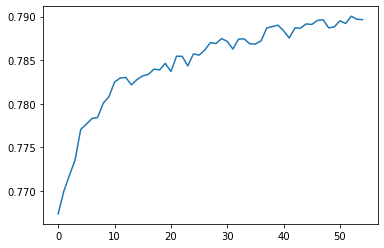

In [42]:
#train_loss = model.history.history['loss']
#train_acc = model.history.history['accuracy']
val_auc = model.history.history['auc']
#val_loss = model.history.history['val_loss']
#plt.plot(train_loss)
#plt.plot(train_acc)
plt.plot(val_auc)
#plt.plot(val_loss)
plt.show()

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2900      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


## Large Model

In [44]:
df_large = df.sample(n=1000000, random_state=42)

In [45]:
x2 = pd.DataFrame(df_large.iloc[0: ,1:])
y2 = pd.DataFrame(df_large.iloc[0: ,0])
y2 = y2.to_numpy()
y2

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [48]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled_train2 = scaler.fit_transform(x2)
scaled_train_df2 = pd.DataFrame(scaled_train2, columns=x2.columns.values)
scaled_train_df2.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,0.101943,0.3508,0.498235,0.017492,0.544215,0.179632,0.492331,0.084047,0.5,0.135456,...,0.011504,0.521027,0.0,0.066246,0.118880,0.142701,0.052139,0.195613,0.148251,0.147440
1,0.015331,0.7084,0.198657,0.097778,0.097616,0.382099,0.172558,0.730190,0.0,0.197007,...,0.264755,0.238134,0.0,0.038139,0.032982,0.142794,0.173847,0.039346,0.113713,0.186634
2,0.101814,0.5668,0.916908,0.069160,0.756326,0.034799,0.303935,0.331731,0.0,0.044648,...,0.556019,0.218077,1.0,0.028102,0.055565,0.144087,0.062723,0.030392,0.052865,0.057615
3,0.130469,0.3778,0.291300,0.039991,0.483623,0.032459,0.487162,0.810098,1.0,0.043813,...,0.752418,0.823788,0.0,0.018188,0.049462,0.144667,0.064881,0.038520,0.046786,0.090389
4,0.081170,0.7446,0.166662,0.132681,0.663312,0.148809,0.636546,0.631498,0.5,0.034690,...,0.582694,0.875521,1.0,0.058638,0.072492,0.259748,0.094172,0.073300,0.095569,0.107862


In [53]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(scaled_train_df2, y2, test_size=0.20, random_state=42)

In [54]:
x2_train.shape

(800000, 28)

In [51]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(28,)))
model2.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model2.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model2.add(layers.Dense(1, activation='sigmoid'))  # adds a layer with 1 neurons, linear (aka NO) activation

In [52]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC()])

In [55]:
model2.fit(x2_train, y2_train, epochs=55, validation_data=(x2_test,y2_test), batch_size=1)

Epoch 1/55
800000/800000 [==============================] - 638s 796us/step - loss: 0.6320 - accuracy: 0.6348 - auc_1: 0.6849 - val_loss: 0.5888 - val_accuracy: 0.6849 - val_auc_1: 0.7543
Epoch 2/55
800000/800000 [==============================] - 629s 787us/step - loss: 0.5870 - accuracy: 0.6858 - auc_1: 0.7528 - val_loss: 0.5706 - val_accuracy: 0.7004 - val_auc_1: 0.7722
Epoch 3/55
800000/800000 [==============================] - 648s 810us/step - loss: 0.5752 - accuracy: 0.6966 - auc_1: 0.7660 - val_loss: 0.5713 - val_accuracy: 0.7003 - val_auc_1: 0.7731
Epoch 4/55
800000/800000 [==============================] - 643s 803us/step - loss: 0.5689 - accuracy: 0.7015 - auc_1: 0.7727 - val_loss: 0.5647 - val_accuracy: 0.7052 - val_auc_1: 0.7788
Epoch 5/55
800000/800000 [==============================] - 622s 777us/step - loss: 0.5648 - accuracy: 0.7055 - auc_1: 0.7770 - val_loss: 0.5675 - val_accuracy: 0.7027 - val_auc_1: 0.7818
Epoch 6/55
800000/800000 [==============================] - 

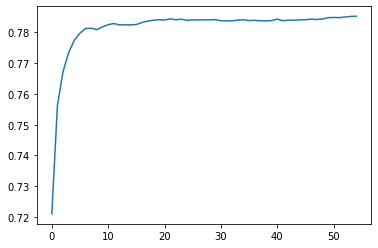

In [56]:
#train_loss2 = model2.history.history['loss']
#train_acc2 = model2.history.history['accuracy']
val_auc2 = model2.history.history['auc_1']
#val_loss2 = model2.history.history['val_loss']
#plt.plot(train_loss2)
#plt.plot(train_acc2)
plt.plot(val_auc2)
#plt.plot(val_loss2)
plt.show()

# All Data

In [5]:
x3 = pd.DataFrame(df.iloc[0: ,1:])
y3 = pd.DataFrame(df.iloc[0: ,0])
y3 = y3.to_numpy()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler3 = MinMaxScaler(feature_range=(0, 1))
scaled_train3 = scaler3.fit_transform(x3)
scaled_train_df3 = pd.DataFrame(scaled_train3, columns=x3.columns.values)
scaled_train_df3.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,0.050286,0.3696,0.564642,0.021254,0.302234,0.062910,0.458153,0.186400,0.0,0.103509,...,0.497833,0.486774,1.0,0.031874,0.038707,0.113156,0.055766,0.038035,0.061924,0.067873
1,0.053521,0.5676,0.603005,0.097277,0.410339,0.097729,0.406135,0.043934,1.0,0.054424,...,0.271924,0.499667,0.0,0.005662,0.031445,0.114120,0.059877,0.041314,0.062246,0.058135
2,0.044328,0.8020,0.030563,0.029457,0.622153,0.098682,0.715905,0.896692,0.0,0.057842,...,0.725909,0.758205,0.0,0.020806,0.045090,0.114119,0.057983,0.042641,0.050959,0.055869
3,0.090466,0.3200,0.768393,0.129367,0.753154,0.168171,0.222741,0.229379,0.0,0.194996,...,0.364121,0.109675,0.0,0.021726,0.041143,0.115758,0.042198,0.046364,0.065315,0.077971
4,0.070221,0.5660,0.936646,0.057322,0.154449,0.055490,0.319773,0.235268,0.0,0.053402,...,0.425142,0.532329,0.0,0.016970,0.057617,0.114235,0.049969,0.061272,0.051523,0.059396


In [9]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(scaled_train_df3, y3, test_size=0.20, random_state=42)

In [10]:
x3_train.shape

(8800000, 28)

In [13]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.Input(shape=(28,)))
model3.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model3.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model3.add(layers.Dense(1, activation='sigmoid'))  # adds a layer with 1 neurons, linear (aka NO) activation

In [14]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC()])

In [15]:
model3.fit(x3_train, y3_train, epochs=5, validation_data=(x3_test,y3_test), batch_size=1)

Epoch 1/5
8800000/8800000 [==============================] - 6546s 744us/step - loss: 0.5956 - accuracy: 0.6773 - auc: 0.7418 - val_loss: 0.5666 - val_accuracy: 0.7063 - val_auc: 0.7804
Epoch 2/5
8800000/8800000 [==============================] - 6310s 717us/step - loss: 0.5698 - accuracy: 0.7037 - auc: 0.7746 - val_loss: 0.5955 - val_accuracy: 0.6871 - val_auc: 0.7679
Epoch 3/5
8800000/8800000 [==============================] - 6087s 692us/step - loss: 0.5678 - accuracy: 0.7066 - auc: 0.7775 - val_loss: 0.5683 - val_accuracy: 0.7094 - val_auc: 0.7803
Epoch 4/5
8800000/8800000 [==============================] - 6207s 705us/step - loss: 0.5655 - accuracy: 0.7088 - auc: 0.7799 - val_loss: 0.5601 - val_accuracy: 0.7136 - val_auc: 0.7861
Epoch 5/5
8800000/8800000 [==============================] - 6471s 735us/step - loss: 0.5646 - accuracy: 0.7090 - auc: 0.7800 - val_loss: 0.5664 - val_accuracy: 0.7072 - val_auc: 0.7820


In [ ]:
#train_loss2 = model2.history.history['loss']
#train_acc2 = model2.history.history['accuracy']
val_auc2 = model2.history.history['auc_1']
#val_loss2 = model2.history.history['val_loss']
#plt.plot(train_loss2)
#plt.plot(train_acc2)
plt.plot(val_auc2)
#plt.plot(val_loss2)
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('HIGGS.csv', header = None)
#df_small = df.sample(n=100000, random_state=42)
#df_small.head()


x = pd.DataFrame(df_small.iloc[0: ,1:])
y = pd.DataFrame(df_small.iloc[0: ,0])
y = y.to_numpy()
y

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)
scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)
scaled_train_df.head()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=42)

x_train.shape

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model.add(layers.Dense(1, activation='sigmoid'))  # adds a layer with 1 neurons, linear (aka NO) activation

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC()])

model.fit(x_train, y_train, epochs=55, validation_data=(x_test,y_test), batch_size=1)

# model.history.history

#train_loss = model.history.history['loss']
#train_acc = model.history.history['accuracy']
val_auc = model.history.history['auc']
#val_loss = model.history.history['val_loss']
#plt.plot(train_loss)
#plt.plot(train_acc)
plt.plot(val_auc)
#plt.plot(val_loss)
plt.show()

model.summary()

## Large Model

df_large = df.sample(n=1000000, random_state=42)

x2 = pd.DataFrame(df_large.iloc[0: ,1:])
y2 = pd.DataFrame(df_large.iloc[0: ,0])
y2 = y2.to_numpy()
y2

scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled_train2 = scaler.fit_transform(x2)
scaled_train_df2 = pd.DataFrame(scaled_train2, columns=x2.columns.values)
scaled_train_df2.head()

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(scaled_train_df2, y2, test_size=0.20, random_state=42)

x2_train.shape

model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(28,)))
model2.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model2.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model2.add(layers.Dense(1, activation='sigmoid'))  # adds a layer with 1 neurons, linear (aka NO) activation

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC()])

model2.fit(x2_train, y2_train, epochs=55, validation_data=(x2_test,y2_test), batch_size=1)

#train_loss2 = model2.history.history['loss']
#train_acc2 = model2.history.history['accuracy']
val_auc2 = model2.history.history['auc_1']
#val_loss2 = model2.history.history['val_loss']
#plt.plot(train_loss2)
#plt.plot(train_acc2)
plt.plot(val_auc2)
#plt.plot(val_loss2)
plt.show()

# All Data

x3 = pd.DataFrame(df.iloc[0: ,1:])
y3 = pd.DataFrame(df.iloc[0: ,0])
y3 = y3.to_numpy()

from sklearn.preprocessing import MinMaxScaler
scaler3 = MinMaxScaler(feature_range=(0, 1))
scaled_train3 = scaler3.fit_transform(x3)
scaled_train_df3 = pd.DataFrame(scaled_train3, columns=x3.columns.values)
scaled_train_df3.head()

from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(scaled_train_df3, y3, test_size=0.20, random_state=42)

x3_train.shape

model3 = tf.keras.Sequential()
model3.add(tf.keras.Input(shape=(28,)))
model3.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model3.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model3.add(layers.Dense(1, activation='sigmoid'))  # adds a layer with 1 neurons, linear (aka NO) activation

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC()])

model3.fit(x3_train, y3_train, epochs=5, validation_data=(x3_test,y3_test), batch_size=1)

#train_loss2 = model2.history.history['loss']
#train_acc2 = model2.history.history['accuracy']
val_auc2 = model2.history.history['auc_1']
#val_loss2 = model2.history.history['val_loss']
#plt.plot(train_loss2)
#plt.plot(train_acc2)
plt.plot(val_auc2)
#plt.plot(val_loss2)
plt.show()